# Калибровка вероятностей

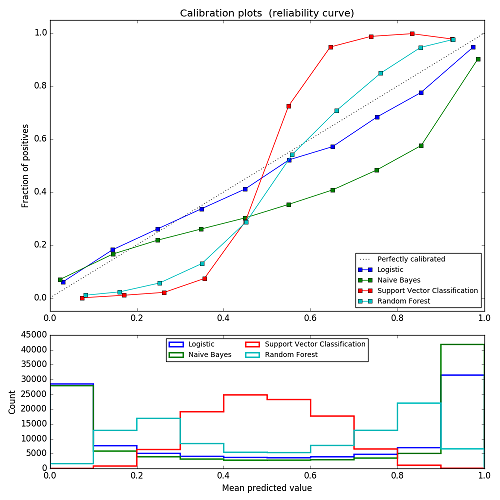

Обучим логистическую регрессию и решающее дерево, а затем откалибруем дерево методами:
*  isotonic regression
*  sigmoid

Построим калибровочные кривые.

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=100_000, n_features=20, n_informative=2, n_redundant=10, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.99, random_state=42
)

In [17]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(C=1.0)
dt = DecisionTreeClassifier(max_depth = 6)
dt_isotonic = CalibratedClassifierCV(dt, cv=3, method="isotonic")
dt_sigmoid = CalibratedClassifierCV(dt, cv=3, method="sigmoid")

clf_list = [
    (lr, "Logistic"),
    (dt, "Decision Tree"),
    (dt_isotonic, "Decision Tree + Isotonic"),
    (dt_sigmoid, "Decision Tree + Sigmoid"),
]

* Sigmoid - это просто обучение логистической регрессии на предсказаниях модели

* Isotonic - обучаем кусочную монотонно возрастающую (неубывающую) функцию так, чтобы она приближала исходные данные с минимальной MSE.

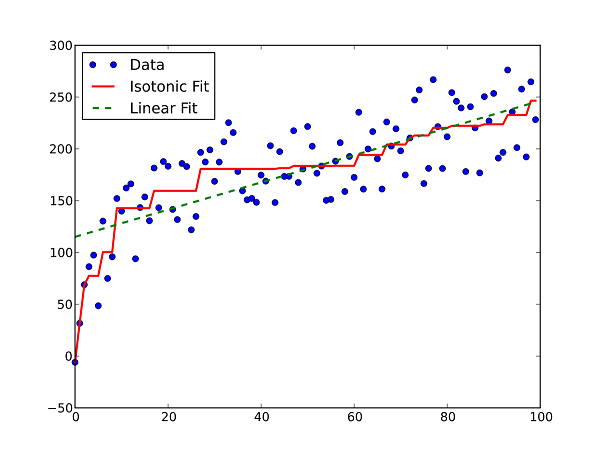

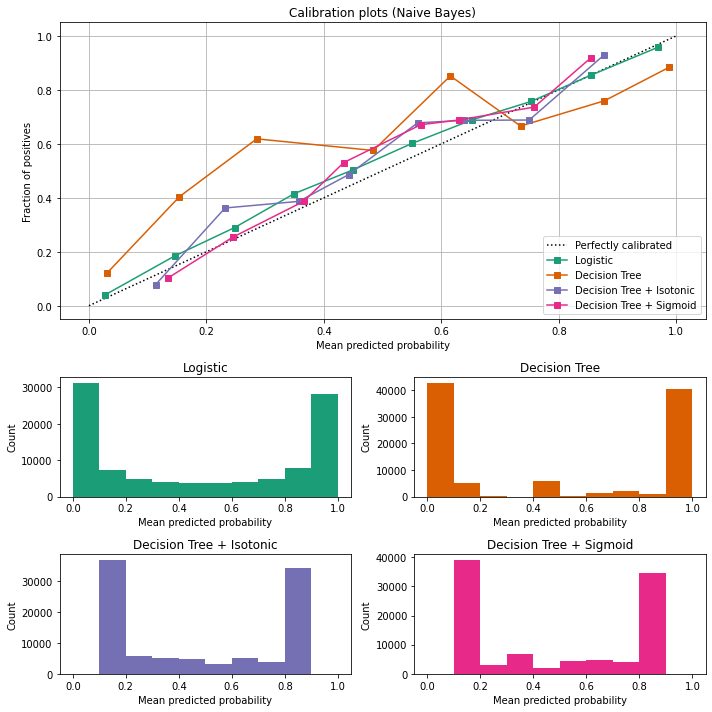

In [18]:
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()